In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
%matplotlib inline

In [164]:
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']
f_len = len(features)

In [165]:
#Это мой вариант считывания данных, ниже находится аналогичный предыдущим лабам
#data = pd.read_excel('лаба.xlsx', sheet_name='исходные данные', index_col=0).iloc[:, :-6]
#data.columns = features
#data.head()

In [166]:

#data = pd.read_excel(r'data\data_discr.xlsx', sheet_name="l1", index_col=0).loc[:, features]
data = pd.read_excel(r'data\data.xlsx', sheet_name="l1", index_col=0).loc[:, features]
data.columns=features
data.head()

x1     x2        x3        x4        x5         x6  \
Наименование субъекта                                                         
Алтайский край          9.1  71.61  0.026759  0.009063  1.376780  20.276651   
Амурская область       10.0  68.66  0.011392  0.017722  2.501266  18.326582   
Архангельская область   9.0  72.34  0.019366  0.031690  0.757923  18.470951   
Астраханская область   10.9  73.86  0.028827  0.013917  1.332008  14.683897   
Белгородская область    8.5  74.21  0.023886  0.009038  0.694642  21.408005   

                          x7          x8          x9  
Наименование субъекта                                 
Алтайский край         18.33  237.364221   49.792404  
Амурская область       26.41  381.100506  430.296203  
Архангельская область  29.19  721.168134  167.017606  
Астраханская область   21.56  550.095129   95.087475  
Белгородская область   26.07  559.056811  108.048418

In [167]:
#стандартизация
index = data.index
columns = data.columns
scaled = (data - data.mean(axis=0)) / data.std()
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 
scaled_data.head()

x1        x2        x3        x4        x5  \
Наименование субъекта                                                     
Алтайский край        -0.467649 -0.456302  0.268870 -0.699761  0.182642   
Амурская область      -0.065229 -1.690716 -0.990986 -0.092843  2.274442   
Архангельская область -0.512362 -0.150837 -0.337230  0.886336 -0.968575   
Астраханская область   0.337191  0.485200  0.438446 -0.359569  0.099355   
Белгородская область  -0.735929  0.631655  0.033371 -0.701538 -1.086291   

                             x6        x7        x8        x9  
Наименование субъекта                                          
Алтайский край        -0.207484 -0.797236 -0.411657 -0.394254  
Амурская область      -0.450501  0.254454 -0.267659  0.899483  
Архангельская область -0.432510  0.616298  0.073029  0.004319  
Астраханская область  -0.904452 -0.376820 -0.098356 -0.240248  
Белгородская область  -0.066495  0.210200 -0.089378 -0.196180

In [168]:
correlation = scaled_data.corr() #корреляционная матрица
correlation

x1        x2        x3        x4        x5        x6        x7  \
x1  1.000000  0.213093 -0.043380  0.105091  0.081628 -0.220474 -0.038171   
x2  0.213093  1.000000 -0.012287 -0.083331 -0.384093 -0.038851  0.004326   
x3 -0.043380 -0.012287  1.000000  0.275532  0.197437 -0.070878  0.032258   
x4  0.105091 -0.083331  0.275532  1.000000  0.020829 -0.012319  0.003618   
x5  0.081628 -0.384093  0.197437  0.020829  1.000000 -0.039528 -0.017021   
x6 -0.220474 -0.038851 -0.070878 -0.012319 -0.039528  1.000000  0.627177   
x7 -0.038171  0.004326  0.032258  0.003618 -0.017021  0.627177  1.000000   
x8  0.226327  0.024706  0.070955  0.051996 -0.087294  0.115529  0.470741   
x9  0.232855 -0.001024  0.018910  0.026378 -0.094451  0.034849  0.389916   

          x8        x9  
x1  0.226327  0.232855  
x2  0.024706 -0.001024  
x3  0.070955  0.018910  
x4  0.051996  0.026378  
x5 -0.087294 -0.094451  
x6  0.115529  0.034849  
x7  0.470741  0.389916  
x8  1.000000  0.975433  
x9  0.975433  1.000000

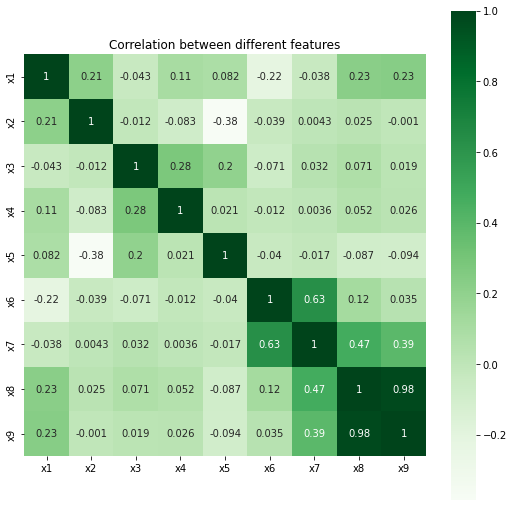

In [169]:
plt.figure(figsize=(9,9)) 
sns.heatmap(correlation, vmax=1, square=True, annot=True,cmap='Greens')
plt.title('Correlation between different features')
plt.show()

In [170]:
# проверка гипотезы о незначимости корреляционной матрицы
eigenvalues, eigenvector = np.linalg.eig(correlation)
couple_lst = []
for i in range(len(eigenvalues)):
    couple_lst.append((eigenvalues[i], eigenvector[:, i]))

lst = sorted(couple_lst, key=lambda x: x[0], reverse=True)
eigenvalues_sorted = sorted(eigenvalues, reverse=True)

In [171]:
eigenvalues_sorted

[2.42099668724782,
 1.5767315289838424,
 1.4993623167202363,
 1.128765421568446,
 0.8767361332067698,
 0.8017766366727689,
 0.3984578346059277,
 0.2792095334606993,
 0.01796390753349436]

In [172]:
import math

def chi_2(n, k, R):
    return -(n-1/6*(2*k+5))*math.log(np.linalg.det(R))

chi2_z = chi_2(scaled_data.shape[0], scaled_data.shape[1], correlation)
p_value =sts.chi2.sf(chi2_z, scaled_data.shape[1]* (scaled_data.shape[1]-1) / 2)
print("Статистика критерия: ", chi2_z)
print("Достигаемый уровень значимости: ", p_value)
if p_value > 0.05:
    print("Гипотеза принимается, матрица парных коэффициентов корреляции незначима.")
else:
    print('Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.')

Статистика критерия:  381.65489609370536
Достигаемый уровень значимости:  2.425489307767509e-59
Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.


In [173]:
#Доверительные интервалы
def eigenval_left(l, n):
    return l / (1 + sts.norm.ppf(0.975) * math.sqrt(2/(n-1)))

def eigenval_right(l, n):
    return  l / (1 - sts.norm.ppf(0.975) * math.sqrt(2/(n-1)))

conf_interval = np.empty((f_len, 3))
for i in range(conf_interval.shape[0]):
    conf_interval[i, 0] = eigenval_left(eigenvalues_sorted[i], scaled_data.shape[0])
    conf_interval[i, 1] = eigenvalues_sorted[i]
    conf_interval[i, 2] = eigenval_right(eigenvalues_sorted[i], scaled_data.shape[0])

print('Доверительные интервалы для собственных значений корреляционной матрицы:')
conf_interval_df = pd.DataFrame(conf_interval, columns=["left_border", "eig", "right_border"])
conf_interval_df

Доверительные интервалы для собственных значений корреляционной матрицы:


left_border       eig  right_border
0     1.858832  2.420997      3.470610
1     1.210608  1.576732      2.260317
2     1.151205  1.499362      2.149405
3     0.866662  1.128765      1.618137
4     0.673155  0.876736      1.256841
5     0.615601  0.801777      1.149384
6     0.305934  0.398458      0.571208
7     0.214376  0.279210      0.400260
8     0.013793  0.017964      0.025752

In [174]:
#Проверка гипотезы о кратности собственных чисел

N = 85 # Число наблюдений
r = 2 # Число кратных корней
z = (N - 1) * sum(np.log(eigenvalues_sorted[:2])) + (N - 1) * r * np.log(1 / r * sum(eigenvalues_sorted[:2]))
n = r * (r + 1) / 2 - 1 # Число степеней свободы
p_val = 2 * min(sts.chi2.cdf(z, n), sts.chi2.sf(z, n))
print("Достигаемый уровень значимости: ",p_val)
if p_val > 0.05:
    print(f"Гипотеза о кратности собственных чисел принимается")
else:
    print(f"Гипотеза о кратности собственных чисел отвергается")

Достигаемый уровень значимости:  3.9962582760902135e-50
Гипотеза о кратности собственных чисел отвергается


In [175]:
# оценка уровня информативности
pc = 2
lmbd = 0

'''for i in range(pc):
    lmbd = lmbd + eigenvalues_sorted[i]

I = lmbd * 100 / f_len'''

for i in range(4):
    lmbd = lmbd + eigenvalues_sorted[i]
    I = lmbd * 100 / f_len
    print(f"Оценка информативности для {i + 1} главных компонент:")
    print('I(x) = {:.3f}%'.format(I))


Оценка информативности для 1 главных компонент:
I(x) = 26.900%
Оценка информативности для 2 главных компонент:
I(x) = 44.419%
Оценка информативности для 3 главных компонент:
I(x) = 61.079%
Оценка информативности для 4 главных компонент:
I(x) = 73.621%


Значение pc выбирается так, чтобы информативность была выше 70% (насколько мы поняли)

In [176]:
# Критерий Кайзера
print("Критерий Кайзера: ", len(eigenvalues[eigenvalues > 1]))
if len(eigenvalues[eigenvalues > 1]) >= pc:
    print(f"Гипотеза о достаточности {pc} главных компонент принимается")
else:
    print(f"Гипотеза о достаточности {pc} главных компонент отвергается")

Критерий Кайзера:  4
Гипотеза о достаточности 2 главных компонент принимается


In [177]:
# матрица дисперсий
dispersion = np.empty(len(eigenvalues))
eigenvalues_sum = eigenvalues.sum()

for i in range(dispersion.shape[0]):
    dispersion[i] = eigenvalues[i] / eigenvalues_sum 

var = map(lambda x: x / eigenvalues_sum, eigenvalues_sorted)
df = pd.DataFrame(
    zip(
        eigenvalues_sorted,
        range(1, len(eigenvalues_sorted) + 1),
        map(lambda x: round(x / eigenvalues_sum, 2), eigenvalues_sorted)
    ),
    columns=["eig", "number", "variance_share"]
)
df

eig  number  variance_share
0  2.420997       1            0.27
1  1.576732       2            0.18
2  1.499362       3            0.17
3  1.128765       4            0.13
4  0.876736       5            0.10
5  0.801777       6            0.09
6  0.398458       7            0.04
7  0.279210       8            0.03
8  0.017964       9            0.00

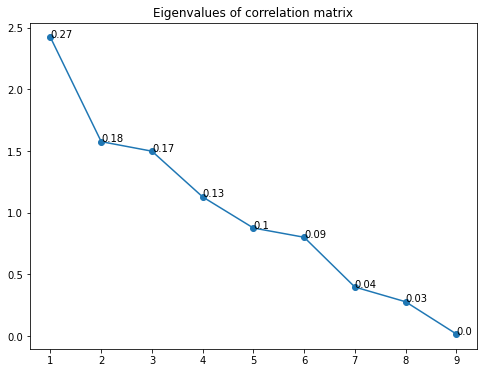

In [178]:
plt.figure(figsize=(8, 6))
plt.title('Eigenvalues of correlation matrix')
plt.plot(df['number'], df['eig'], marker='o')
ax = plt.gca()
df.apply(lambda x: ax.annotate(x['variance_share'], (x['number'], x['eig'])), axis=1)
plt.show()

In [179]:
result = pd.concat([df, np.cumsum(df[['eig', 'variance_share']])], axis=1)
result.columns = list(df.columns) + ['cum_eig', 'cum_variance_share']
result

eig  number  variance_share   cum_eig  cum_variance_share
0  2.420997       1            0.27  2.420997                0.27
1  1.576732       2            0.18  3.997728                0.45
2  1.499362       3            0.17  5.497091                0.62
3  1.128765       4            0.13  6.625856                0.75
4  0.876736       5            0.10  7.502592                0.85
5  0.801777       6            0.09  8.304369                0.94
6  0.398458       7            0.04  8.702827                0.98
7  0.279210       8            0.03  8.982036                1.01
8  0.017964       9            0.00  9.000000                1.01

In [180]:
vector_df = pd.DataFrame(eigenvector, columns=['Factor_' + str(i + 1) for i in range(f_len)], index=features) 
vector_df

Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  Factor_6  Factor_7  \
x1 -0.144169 -0.006497  0.047824  0.461221 -0.525284 -0.048490 -0.675116   
x2 -0.047247 -0.022165  0.046005 -0.519536 -0.295610  0.490644 -0.278565   
x3 -0.027477 -0.036141  0.078756  0.349138 -0.049303 -0.485564  0.127446   
x4 -0.043670 -0.010648 -0.035172 -0.277409 -0.108605 -0.398160  0.014220   
x5  0.087562 -0.005610  0.054556 -0.525935  0.109928 -0.579824 -0.430381   
x6 -0.244321 -0.036298  0.633737  0.108313  0.610028  0.125761 -0.311748   
x7 -0.462947 -0.045295 -0.732703  0.054179  0.401034  0.031436 -0.256196   
x8 -0.600738  0.718121  0.145518 -0.111156 -0.171861 -0.073914  0.198214   
x9 -0.575982 -0.692061  0.159778 -0.121960 -0.218822 -0.064426  0.250671   

    Factor_8  Factor_9  
x1  0.155286  0.077403  
x2 -0.354040 -0.440662  
x3 -0.601665 -0.503381  
x4  0.649254 -0.572475  
x5 -0.230839  0.354857  
x6  0.091561 -0.179208  
x7 -0.057360 -0.114441  
x8 -0.043407  0.117099  
x9 -0.012906  0.184004


vector_df = pd.DataFrame(eigenvector, columns=['Factor_' + str(i + 1) for i in range(f_len)], index=features)
vector_df

In [181]:
# построение главных компонент
pc = 2

u = pd.DataFrame(
    data=np.array([couple_lst[i][1] for i in range(f_len)]).T,
    columns=['Factor_' + str(i + 1) for i in range(f_len)],
    index=features
)
u

Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  Factor_6  Factor_7  \
x1 -0.144169 -0.006497  0.047824  0.461221 -0.525284 -0.048490 -0.675116   
x2 -0.047247 -0.022165  0.046005 -0.519536 -0.295610  0.490644 -0.278565   
x3 -0.027477 -0.036141  0.078756  0.349138 -0.049303 -0.485564  0.127446   
x4 -0.043670 -0.010648 -0.035172 -0.277409 -0.108605 -0.398160  0.014220   
x5  0.087562 -0.005610  0.054556 -0.525935  0.109928 -0.579824 -0.430381   
x6 -0.244321 -0.036298  0.633737  0.108313  0.610028  0.125761 -0.311748   
x7 -0.462947 -0.045295 -0.732703  0.054179  0.401034  0.031436 -0.256196   
x8 -0.600738  0.718121  0.145518 -0.111156 -0.171861 -0.073914  0.198214   
x9 -0.575982 -0.692061  0.159778 -0.121960 -0.218822 -0.064426  0.250671   

    Factor_8  Factor_9  
x1  0.155286  0.077403  
x2 -0.354040 -0.440662  
x3 -0.601665 -0.503381  
x4  0.649254 -0.572475  
x5 -0.230839  0.354857  
x6  0.091561 -0.179208  
x7 -0.057360 -0.114441  
x8 -0.043407  0.117099  
x9 -0.012906  0.184004

In [196]:
# матрица нагрузок
A = np.diag(np.sqrt(eigenvalues_sorted)) @ u
A.index = features
A

Factor_1  Factor_2
x1 -0.224321 -0.010109
x2 -0.059328 -0.027832
x3 -0.033645 -0.044254
x4 -0.046397 -0.011313
x5  0.081988 -0.005253
x6 -0.218770 -0.032502
x7 -0.292228 -0.028592
x8 -0.317432  0.379457
x9 -0.077199 -0.092757

In [203]:
# Матрица индивидуальных значений главных компонент
F = (np.linalg.inv(A.T @ A) @ A.T @ scaled_data.T).T
F.columns = ['Factor_' + str(i + 1) for i in range(2)]
F = F.sort_values("Factor_1", ascending=False)
F = F.iloc[:, :pc] # Берем первые pc главных компонент
F[:85]

Factor_1  Factor_2
Наименование субъекта                                
Курганская область                 3.296519  1.782640
Кемеровская область                3.184179  2.426619
Карачаево-Черкесская Рес-публика   2.963671  1.315372
Республика Хакасия                 2.850533  2.189658
Республика Мордовия                2.567402  0.908735
...                                     ...       ...
Сахалинская область               -6.206233 -0.798285
г. Санкт-Петербург                -6.243146 -4.441118
Ямало-Ненецкий автономный округ   -7.349197  4.478804
Ненецкий автономный округ         -8.856499  5.686476
г. Москва                        -10.775441 -6.571468

[85 rows x 2 columns]

In [184]:
# Загружаем метки классов, полученные на 1 лабе для метода Уорда и К-средних

classes = pd.read_excel(r'data\classes_old.xlsx')
F['ward_old'] = classes.ward_old.values
F['kmeans_old'] = classes.kmeans_old.values
F

Factor_1   Factor_2  ward_old  kmeans_old
Наименование субъекта                                                      
Алтайский край                    2.903902   1.549877         5           3
Амурская область                 -3.316451  -4.961565         7           1
Архангельская область            -0.501858   0.061933         5           3
Астраханская область              1.632145   1.150647         5           3
Белгородская область              0.779589   0.883596         5           3
...                                    ...        ...       ...         ...
Чеченская Республика              2.696493   1.318608         4           2
Чувашская Республика              2.938408   1.534033         5           3
Чукотский автономный округ       -6.918780  -4.945729         3           4
Ямало-Ненецкий автономный округ -27.707707 -18.285399         1           6
Ярославская область               1.474353   1.358023         5           3

[85 rows x 4 columns]

In [185]:
F.iloc[:, :pc]

Factor_1   Factor_2
Наименование субъекта                                
Алтайский край                    2.903902   1.549877
Амурская область                 -3.316451  -4.961565
Архангельская область            -0.501858   0.061933
Астраханская область              1.632145   1.150647
Белгородская область              0.779589   0.883596
...                                    ...        ...
Чеченская Республика              2.696493   1.318608
Чувашская Республика              2.938408   1.534033
Чукотский автономный округ       -6.918780  -4.945729
Ямало-Ненецкий автономный округ -27.707707 -18.285399
Ярославская область               1.474353   1.358023

[85 rows x 2 columns]

Text(0.5, 1.0, 'ward method')

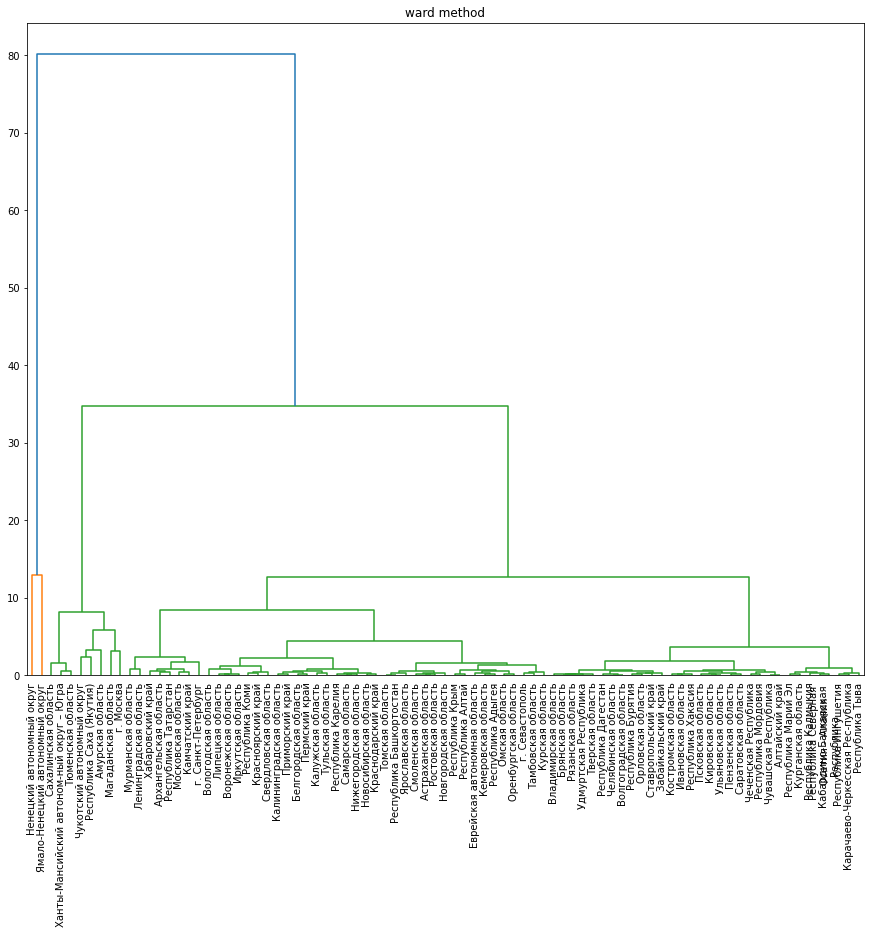

In [186]:
Z = hierarchy.linkage(F.iloc[:, :pc], method='ward', optimal_ordering=True)
    #строим дендрограмму

plt.figure(figsize=(15,12)) # задаем размеры окна с графиками

hierarchy.dendrogram(Z, labels=F.index, leaf_font_size=10)

# Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

plt.title('{} method'.format('ward'))

In [187]:
n_clusters = 7
ward = AgglomerativeClustering(n_clusters=n_clusters , linkage='ward')
ward.fit(F.iloc[:, :pc])

kmeans = KMeans(n_clusters=n_clusters , random_state=36)
kmeans.fit(F.iloc[:, :pc])

F['ward_new'] = ward.labels_
F['kmeans_new'] = kmeans.labels_
F

Factor_1   Factor_2  ward_old  kmeans_old  \
Наименование субъекта                                                         
Алтайский край                    2.903902   1.549877         5           3   
Амурская область                 -3.316451  -4.961565         7           1   
Архангельская область            -0.501858   0.061933         5           3   
Астраханская область              1.632145   1.150647         5           3   
Белгородская область              0.779589   0.883596         5           3   
...                                    ...        ...       ...         ...   
Чеченская Республика              2.696493   1.318608         4           2   
Чувашская Республика              2.938408   1.534033         5           3   
Чукотский автономный округ       -6.918780  -4.945729         3           4   
Ямало-Ненецкий автономный округ -27.707707 -18.285399         1           6   
Ярославская область               1.474353   1.358023         5           3   

                                 ward_new  kmeans_new  
Наименование субъекта                                  
Алтайский край                          1           3  
Амурская область                        0           5  
Архангельская область                   5           4  
Астраханская область                    2           0  
Белгородская область                    2           0  
...                                   ...         ...  
Чеченская Республика                    1           3  
Чувашская Республика                    1           3  
Чукотский автономный округ              0           2  
Ямало-Ненецкий автономный округ         4           1  
Ярославская область                     2           0  

[85 rows x 6 columns]

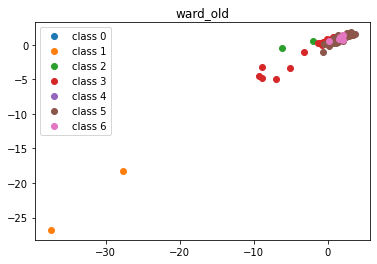

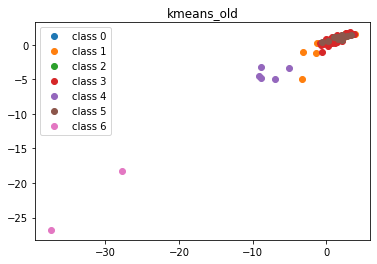

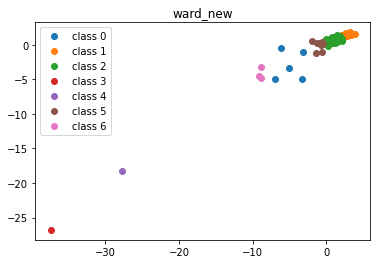

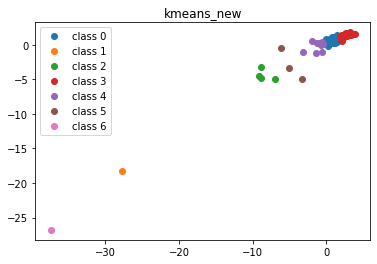

In [188]:
# Построение графика

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    plt.title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        plt.plot(data.Factor_1, data.Factor_2, 'o', label=f'class {i}')
    plt.legend()
    plt.show()


AttributeError: 'DataFrame' object has no attribute 'Factor_3'

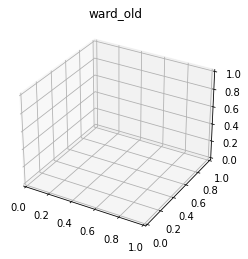

In [189]:
# Трехмерный график
from mpl_toolkits.mplot3d import Axes3D

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        ax.scatter(data.Factor_1, data.Factor_2, data.Factor_3, 'o', label=f'class {i}')
    plt.legend()
    plt.show()

In [191]:
# выгрузка в файл
F.to_excel('Lab3_python.xlsx')